<a href="https://colab.research.google.com/github/suptykarmokarcse/weather-d/blob/main/MileStone_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# DATA LOADING
# ==============================================================================
# Load the provided dataset
try:
    df = pd.read_csv('weatherHistory.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: weatherHistory.csv not found.")
    exit()

# Clean up column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()


Dataset loaded successfully.



--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): Temperature (C)
Dependent Variable (Y): Apparent Temperature (C)

2. Summary Statistics:
Mean of X (Temperature (C)): 11.9327
Mean of Y (Apparent Temperature (C)): 10.8550
Standard Deviation of X (σX): 9.5515
Standard Deviation of Y (σY): 10.6968


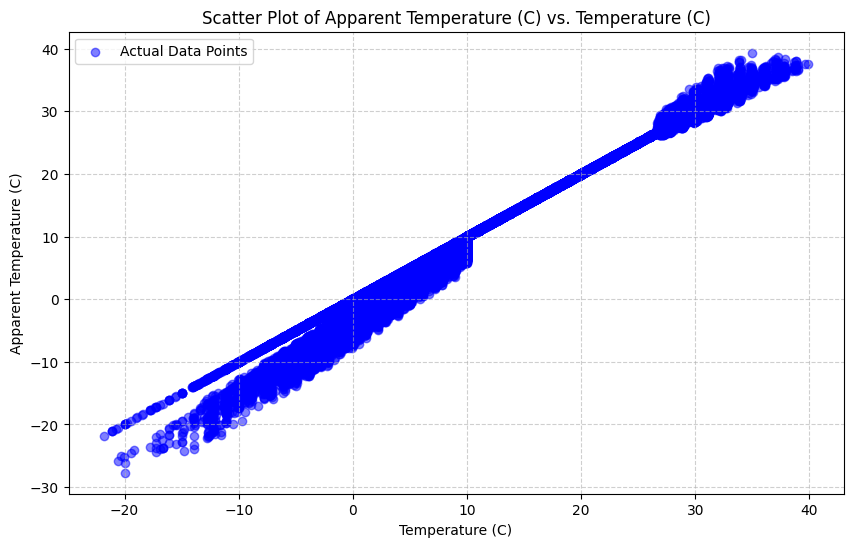

In [2]:
# ==============================================================================
# --- TASK 1: DATA SELECTION AND INITIAL VISUALIZATION ---
# ==============================================================================

# 1. Variable Selection:
X_variable = 'Temperature (C)'  # Independent Variable (X)
Y_variable = 'Apparent Temperature (C)' # Dependent Variable (Y)

# Extract variables as NumPy arrays for easier mathematical operations
X = df[X_variable].values
Y = df[Y_variable].values
n = len(X)

print(f"\n--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X_variable}")
print(f"Dependent Variable (Y): {Y_variable}")

# 2. Summary Statistics: Compute Mean and Standard Deviation
X_mean = np.mean(X)
Y_mean = np.mean(Y)
X_std = np.std(X)
Y_std = np.std(Y)

print("\n2. Summary Statistics:")
print(f"Mean of X ({X_variable}): {X_mean:.4f}")
print(f"Mean of Y ({Y_variable}): {Y_mean:.4f}")
print(f"Standard Deviation of X (σX): {X_std:.4f}")
print(f"Standard Deviation of Y (σY): {Y_std:.4f}")

# 3. Scatter Plot: Generate a scatter plot of Y vs. X.
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data Points')
plt.title(f'Scatter Plot of {Y_variable} vs. {X_variable}')
plt.xlabel(X_variable)
plt.ylabel(Y_variable)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show() #


In [3]:
# ==============================================================================
# --- TASK 2: MANUAL CALCULATION OF REGRESSION PARAMETERS ---
# ==============================================================================

print(f"\n--- Task 2: Manual Calculation of Regression Parameters ---")

# Calculate deviations from the mean
X_dev = X - X_mean
Y_dev = Y - Y_mean

# 1. Calculate Components:
# Numerator of β1: Sum of products of deviations, ∑(Xi - X̄)(Yi - Ȳ)
numerator_beta1 = np.sum(X_dev * Y_dev)

# Denominator of β1: Sum of squared deviations of X, ∑(Xi - X̄)²
denominator_beta1 = np.sum(X_dev**2)

print("1. Calculated Components:")
print(f"  Numerator of β1 (Covariance component): {numerator_beta1:.4f}")
print(f"  Denominator of β1 (Variance component): {denominator_beta1:.4f}")

# 2. Compute Slope (β1): β1 = Cov(X, Y) / Var(X)
beta_1 = numerator_beta1 / denominator_beta1

print("\n2. Computed Slope (β1):")
print(f"  β1 = {beta_1:.4f}")

# 3. Compute Intercept (β0): β0 = Ȳ - β1 * X̄
beta_0 = Y_mean - (beta_1 * X_mean)

print("\n3. Computed Y-Intercept (β0):")
print(f"  β0 = {beta_0:.4f}")

# 4. Formulate the Model:
model_equation = f"Ŷ = {beta_0:.4f} + {beta_1:.4f} * X"
print("\n4. Estimated Regression Equation:")
print(f"  {Y_variable} = {beta_0:.4f} + {beta_1:.4f} * {X_variable}")
print(f"  (i.e., {model_equation})")





--- Task 2: Manual Calculation of Regression Parameters ---
1. Calculated Components:
  Numerator of β1 (Covariance component): 9781996.2501
  Denominator of β1 (Variance component): 8799512.4439

2. Computed Slope (β1):
  β1 = 1.1117

3. Computed Y-Intercept (β0):
  β0 = -2.4100

4. Estimated Regression Equation:
  Apparent Temperature (C) = -2.4100 + 1.1117 * Temperature (C)
  (i.e., Ŷ = -2.4100 + 1.1117 * X)



--- Task 3: Visualization of the Fit and Interpretation ---


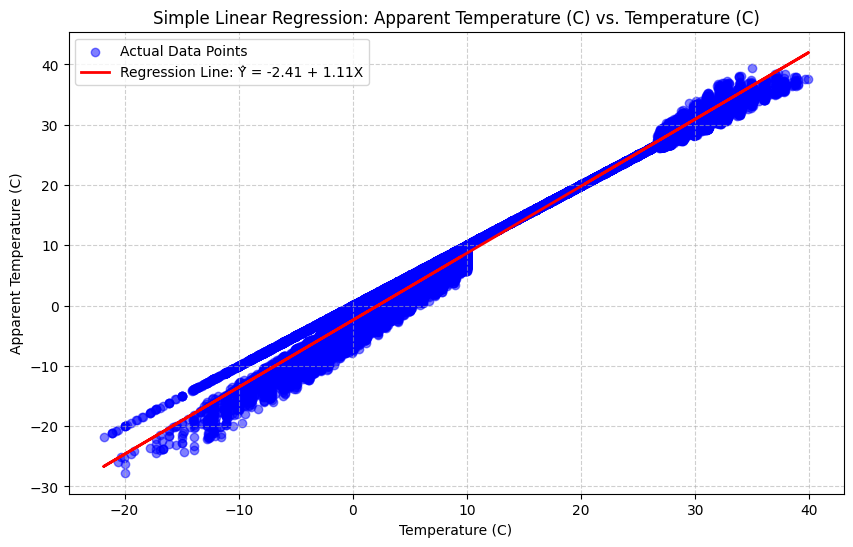


3. Interpretation of the Slope (β1):
The computed slope (β1 = 1.1117) means that for every one degree Celsius increase in the
Actual Temperature (Temperature (C)), the Apparent Temperature (Apparent Temperature (C)) is predicted to
increase by approximately 1.1117 degrees Celsius.


In [4]:
# ==============================================================================
# --- TASK 3: VISUALIZATION OF THE FIT AND INTERPRETATION ---
# ==============================================================================

print(f"\n--- Task 3: Visualization of the Fit and Interpretation ---")

# 1. Generate Predictions: Ŷi = β0 + β1*Xi
Y_hat = beta_0 + beta_1 * X

# 2. Plot Regression Line: Overlay Ŷ vs. X onto the scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X, Y_hat, color='red', linewidth=2, label=f'Regression Line: Ŷ = {beta_0:.2f} + {beta_1:.2f}X')
plt.title(f'Simple Linear Regression: {Y_variable} vs. {X_variable}')
plt.xlabel(X_variable)
plt.ylabel(Y_variable)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show() #
# 3. Interpretation:
print("\n3. Interpretation of the Slope (β1):")
print(f"The computed slope (β1 = {beta_1:.4f}) means that for every one degree Celsius increase in the")
print(f"Actual Temperature ({X_variable}), the Apparent Temperature ({Y_variable}) is predicted to")
print(f"increase by approximately {beta_1:.4f} degrees Celsius.")


In [5]:
# ==============================================================================
# --- TASK 4: STRENGTH OF RELATIONSHIP ---
# ==============================================================================

print(f"\n--- Task 4: Strength of Relationship ---")

# 1. Compute Correlation (r):
# Denominator component: Sum of squared deviations of Y, ∑(Yi - Ȳ)²
denominator_Y = np.sum(Y_dev**2)

# Pearson Correlation Coefficient (r) formula:
# r = [∑(Xi - X̄)(Yi - Ȳ)] / [sqrt(∑(Xi - X̄)² * ∑(Yi - Ȳ)²)]
r = numerator_beta1 / np.sqrt(denominator_beta1 * denominator_Y)

print("\n1. Computed Pearson Correlation Coefficient (r):")
print(f"  r = {r:.4f}")

# 2. Compute R²:
R_squared = r**2

print("\n2. Computed Coefficient of Determination (R²):")
print(f"  R² = r² = {R_squared:.4f}")
print(f"  R² percentage: {R_squared * 100:.2f}%")

# 3. Relationship Assessment:
# Assessment of 'r'
if abs(r) >= 0.8:
    strength = "very strong"
elif abs(r) >= 0.6:
    strength = "strong"
elif abs(r) >= 0.3:
    strength = "moderate"
else:
    strength = "weak"

direction = "positive" if r > 0 else "negative"

print("\n3. Relationship Assessment:")
print(f"  - The linear relationship is **{direction}** and **{strength}** (r = {r:.4f}).")
print(f"  - **Interpretation of R²:** {R_squared * 100:.2f}% of the variation in the Dependent Variable")
print(f"    ({Y_variable}) is accounted for by the linear relationship with the Independent Variable")
print(f"    ({X_variable}). This indicates an excellent model fit.")





--- Task 4: Strength of Relationship ---

1. Computed Pearson Correlation Coefficient (r):
  r = 0.9926

2. Computed Coefficient of Determination (R²):
  R² = r² = 0.9853
  R² percentage: 98.53%

3. Relationship Assessment:
  - The linear relationship is **positive** and **very strong** (r = 0.9926).
  - **Interpretation of R²:** 98.53% of the variation in the Dependent Variable
    (Apparent Temperature (C)) is accounted for by the linear relationship with the Independent Variable
    (Temperature (C)). This indicates an excellent model fit.


In [6]:
# ==============================================================================
# --- TASK 5: REFLECTION (To be completed in your written report) ---
# ==============================================================================

print("\n--- Task 5: Reflection ---")
print("Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.")


--- Task 5: Reflection ---
Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.
